# Lab 5: Graphs I

Lab associated with Module 5: Graphs I

***

In [ ]:
# The following lines are used to increase the width of cells to utilize more space on the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [ ]:
import numpy as np

In [ ]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Coming up with a way to visualize the graph data and encode data in the graph

Let us come up with some example to work on

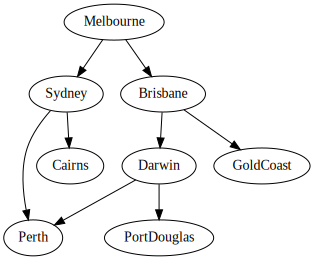

In [ ]:
dot = Digraph()

dot.edge('Melbourne', 'Sydney')
dot.edge('Melbourne', 'Brisbane')
dot.edge('Sydney', 'Perth')
dot.edge('Sydney', 'Cairns')
dot.edge('Brisbane', 'Darwin')
dot.edge('Brisbane', 'GoldCoast')
dot.edge('Darwin', 'Perth')
dot.edge('Darwin', 'PortDouglas')

#dot.view()
dot

This is pretty cool display, but we need to encode this information in a graph, let us try to do that in the following:

In [ ]:
class Node:

    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        self.status = "unvisited"

        #Added code for Q(2)
        self.inTime = None
        self.outTime = None
        self.color = None  # Colour attribute for bi-partite

    def hasOutNeighbor(self, v):

        if v in self.outNeighbors:
            return True
        return False

    def hasInNeighbor(self, v):
        if v in self.inNeighbors:
            return True
        return False

    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False

    def getOutNeighbors(self):
        return self.outNeighbors

    def getInNeighbors(self):
        return self.inNeighbors

    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)

    def addInNeighbor(self, v):
        self.inNeighbors.append(v)

    def __str__(self):
        return str(self.value)

In [ ]:
class Graph:

    def __init__(self):

        self.vertices = []

    def addVertex(self,n):

        self.vertices.append(n)

    def addDiEdge(self, u, v):

        u.addOutNeighbor(v)
        v.addInNeighbor(u)

    # add edges in both directions between u and v
    def addBiEdge(self, u, v):

        self.addDiEdge(u, v)
        self.addDiEdge(v, u)

    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):

        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret

    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

In [ ]:
G = Graph()
for i in range(10):
    G.addVertex( Node(i) )

In [ ]:
V = G.vertices
for i in range(9):
    G.addDiEdge( V[i], V[i+1] )

In [ ]:
print(G)

Graph with:
	 Vertices:
	0,1,2,3,4,5,6,7,8,9,
	 Edges:
	(0,1) (1,2) (2,3) (3,4) (4,5) (5,6) (6,7) (7,8) (8,9) 



Okay, now that our implementation is working fine, let us try to plug-in our data

In [ ]:
G = Graph()
for i in ['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Darwin', 'GoldCoast', 'PortDouglas', 'Cairns']:
    G.addVertex( Node(i) )

In [ ]:
V = G.vertices

In [ ]:
for i in range(len(V)):
    print(i, V[i].value)

0 Melbourne
1 Sydney
2 Brisbane
3 Perth
4 Darwin
5 GoldCoast
6 PortDouglas
7 Cairns


In [ ]:
#dot.edge('Melbourne', 'Sydney')
G.addDiEdge( V[0], V[1] )

#dot.edge('Melbourne', 'Brisbane')
G.addDiEdge( V[0], V[2] )

#dot.edge('Sydney', 'Perth')
G.addDiEdge( V[1], V[3] )

#dot.edge('Sydney', 'Cairns')
G.addDiEdge( V[1], V[7] )

#dot.edge('Brisbane', 'Darwin')
G.addDiEdge( V[2], V[4] )

#dot.edge('Brisbane', 'GoldCoast')
G.addDiEdge( V[2], V[5] )

#dot.edge('Darwin', 'Perth')
G.addDiEdge( V[4], V[3] )

#dot.edge('Darwin', 'PortDouglas')
G.addDiEdge( V[4], V[6] )

In [ ]:
print(G)

Graph with:
	 Vertices:
	Melbourne,Sydney,Brisbane,Perth,Darwin,GoldCoast,PortDouglas,Cairns,
	 Edges:
	(Melbourne,Sydney) (Melbourne,Brisbane) (Sydney,Perth) (Sydney,Cairns) (Brisbane,Darwin) (Brisbane,GoldCoast) (Darwin,Perth) (Darwin,PortDouglas) 



Sounds beautiful, now we have the data in graph format. Let us see if you we can start coding our clever algorithms.

***

### Section 2: Doing a simple DFS

In [ ]:
def DFS(root):

    if root == Null:
        return

    root.visited = True

    for n in root.neighbours:
        if n.visited == False:
            DFS(n)

In [ ]:
def DFS_helper(w):

    w.status = "inprogress"

    for v in w.getOutNeighbors():

        if v.status == "unvisited":

            DFS_helper(v)

    print(w)
    w.status = "done"


def DFS(w, G):

    for v in G.vertices:

        v.status = "unvisited"

    return DFS_helper(w)

In [ ]:
# Let us do the DFS from Melbourne
w = G.vertices[0]

DFS(w, G)

Perth
Cairns
Sydney
PortDouglas
Darwin
GoldCoast
Brisbane
Melbourne


### Section 4: Breadth First Search (BFS)

Now let us see if we can do BFS on the graph, following is first implementation of BFS

In [ ]:
def BFS(root):

    visited = [False] * (num_nodes_in_graph)

    # Create a queue for BFS
    queue = []

    queue.append(root)
    visited[root] = True

    while queue:

        r = queue.pop(0)
        print(r)

        for n in r.adjacent:

            if visited[n] == False:

                visited[n] = True
                queue.append(n)


Let us have another impelementation of BFS

In [ ]:
def BFS(w, G):

    for v in G.vertices:
        v.status = "unvisited"

    n = len(G.vertices)

    Ls = [ [] for i in range(n) ]

    Ls[0] = [w]
    w.status = "visited"

    for i in range(n):
        for u in Ls[i]:

            print(u)

            for v in u.getOutNeighbors():

                if v.status == "unvisited":
                    v.status = "visited"
                    Ls[i + 1].append(v)

In [ ]:
# Let us do the BFS from Melbourne
w = G.vertices[0]

BFS(w, G)

Melbourne
Sydney
Brisbane
Perth
Cairns
Darwin
GoldCoast
PortDouglas


***

#(1)Bidirectional search
- used to find the shortest path between a source and a destination.
- It operates by essentially running two simultaneous breadth-first searches one from each node.
- When their searches collide, we have a match.
- Design an algorithm for bi-directional search, and then code it in this week's ipynb.

- Bidirectional search aims to speed up the process by performing two searches, one at the start node and the other from the end node. It stops as soon as the two searches meet.
- Reduces the search space and improves path finding.
- In this implementation I used the second BFS provided as it was more detailed.
    - It uses the *Graph* class and its *vertices*, *getOutNeighbours()* that traverse the graph with BFS.

###How I implemented Bidirectional search based on lecture
1.     Set the status of all nodes to unvisited, and the start node and end node as visited. They are set to start queue and end queue to perform BFS from both directions.
2.     Bidirectional BFS enters a loop to before this until both queues are empty/ or a meeting point (node) that has been visited from both ends it found.
 - a.     Forward BFS: In forward direction nodes are visited form the start queue, if neighbor is found it is marked visited from the other end (meeting point found).
 - b.     Reverse BFS: In reverse direction nodes are visited from the end_queue. If neighbor is found it is marked as visited from the other end, the loop is broken and meeting_point is set.
 - c.     Path Reconstraction: If a meeting_point is found the code reconstructs the shortest path by backtracking from that variable (meeting_point) to both start_node and end_node. By following nodes that have been marked as visited in the revise BFS.


In [ ]:
#### Placeholder for this modules tasks ####
### Good Luck ###

def bidirectional_search(start_node, end_node, graph):
  for v in graph.vertices:
    # Set all nodes to unvisited
    v.status = "unvisited"

  # Set Start end nodes visited
  start_node.status = "visited"
  end_node.status = "visited"

  # Initalised to perform DFS both directions
  start_queue = [start_node]
  end_queue = [end_node]

  # Befores BFS from start_node and end_node until both queues are empty
  # OR Meeting point (node between start/ end) found
  while start_queue and end_queue:
      # Perform BFS from start_node in the forward direction
      current_start = start_queue.pop(0)
      for neighbor in current_start.getOutNeighbors():
          if neighbor.status == "unvisited":
              neighbor.status = "visited"
              start_queue.append(neighbor)
          if neighbor.status == "visited" and neighbor is not current_start:
              meeting_point = neighbor
              break

      if meeting_point:
          break

      # Reverse BFS - nodes visited from end_queue
      current_end = end_queue.pop(0)
      for neighbor in current_end.getInNeighbors():
          if neighbor.status == "unvisited":
              neighbor.status = "visited"
              end_queue.append(neighbor)
          # If neighbor found that is marked visited from other end meeting_point set
          if neighbor.status == "visited" and neighbor is not current_end:
              meeting_point = neighbor
              break

      if meeting_point: # A node found that has been visited from both ends
          break

  if meeting_point:
      # Reconstruct the path from start_node to meeting_point
      path_start = [meeting_point]
      while path_start[-1] != start_node:
          for neighbor in path_start[-1].getInNeighbors():
              if neighbor.status == "visited":
                  path_start.append(neighbor)
                  break

      # Find path from end_node to meeting_point
      path_end = [meeting_point]
      while path_end[-1] != end_node:
          for neighbor in path_end[-1].getOutNeighbors():
              if neighbor.status == "visited":
                  path_end.append(neighbor)
                  break

      # Combine both paths to get the shortest path
      path_end.pop(0)  # Remove the duplicate meeting_point
      shortest_path = path_start[::-1] + path_end

      return shortest_path

  else:
      return None  # No path found

# Declare nodes
start_node = V[0]  # Melbourne
end_node = V[3]    # Perth

# Find shortest path between nodes
shortest_path = bidirectional_search(start_node, end_node, G)

if shortest_path:
  print("Shortest Path:", "->".join(str(node) for node in shortest_path))
else:
  print("No path found.")

Shortest Path: Melbourne->Sydney->Perth


##Test Case: 1
####Bidirectional search aims to speed up the process of BFS, we are expecting an algorithm that will speed up the search process by half.

-Confirm time efficency

In [ ]:
import time
from random import choice

#Measure time for single BFS or DFS
start_time = time.time()
# BFS or DFS
end_time = time.time()
single_search_time = end_time - start_time

# Set start time variable to time
start_time = time.time()
# Bidirectional search
end_time = time.time()
bidirectional_search_time = end_time - start_time

print("Single BFS/DFS Time:", single_search_time)
print("Bidirectional Search Time:", bidirectional_search_time)


Single BFS/DFS Time: 5.14984130859375e-05
Bidirectional Search Time: 3.409385681152344e-05


***

#(2) Design an algorithm using BFS to determine if a graph is bi-partite.
- Modify the BFS code in this week's lab book, and implement your designed algorithm.

- A graph is bipartite if the nodes can be partitioned into two independent sets A and B such that every edge in the graph connects a node in set A and a node in set B.
   - Ref: https://medium.com/nerd-for-tech/is-graph-bipartite-day-76-python-c0c3cdc9585e

- A dipartite graph the nodes can be sorted into two sets, such that no two nodes within the same set are connected by an edge.
- This algorithms checks if it can mark one of two colours to each node, so that no nodes share the same color.
- Using a colouring coding system to identify if the graph is bipartite.
- For each uncoloured node in the graph
1. Assigns the first colour to the current node (red)
2. Traverses the neighbors of the current node
3. If a neighbor has not been coloured, assign it the opposite colour
4. If a neighbor has already been coloured with same colour as the current node, then the graph cannot be bipartite -> returns false

- Continues assigning colours to uncoloured nodes (checking each for neighbor node colour) until all nodes are colored or a mix is found.
- If at any point a nighbor is found to have the same color as the current node, it shows that the graph can not be bipartite.

- If a graph is bipartite it shows the nodes being divided into two colour classes, that no two adjacent nodes share the same color.

In [ ]:
from queue import Queue
# Function to test graph is bipartite & Save color info
def is_bipartite(graph):
  for vertex in graph.vertices:
    vertex.color = None  # Initialize the color

  for vertex in graph.vertices:
    if vertex.color is None:
      if not bfs_coloring(vertex):
        return False

  return True

# Function BFS with colour
def bfs_coloring(start_vertex):
  queue = Queue()
  queue.put(start_vertex)
  start_vertex.color = "red" # Start vertex

  while not queue.empty():
    current_vertex = queue.get()
    current_color = current_vertex.color

    # Check no adjacent nodes have same colour
    for neighbor in current_vertex.getOutNeighbors():
      if neighbor.color is None:
        # Neighbor has not been explored yet
          if current_color == "red":
              neighbor.color = "blue"
          else:
              neighbor.color = "red"
          print(f"Node: {neighbor.value}, Color: {neighbor.color}")  # Print node and color
          queue.put(neighbor)
      elif neighbor.color == current_color:
        print()
        print("Found edge with same color nodes:")
        print(f"Node: {current_vertex.value}, Color: {current_color}")
        print(f"Node: {neighbor.value}, Color: {neighbor.color}")
        print()
        return False  # Found edge with same color node
  return True

# Initialize colors for each node
for vertex in G.vertices:
  vertex.color = None

if is_bipartite(G):
  print("The graph is bipartite.")
else:
  print("The graph is not bipartite.")

Node: Sydney, Color: blue
Node: Brisbane, Color: blue
Node: Perth, Color: red
Node: Cairns, Color: red
Node: Darwin, Color: red
Node: GoldCoast, Color: red

Found edge with same color nodes:
Node: Darwin, Color: red
Node: Perth, Color: red

The graph is not bipartite.


##Test Case
- As the previous node data outputs a non bipartite - Created a bipartite graph
- Removed edges between nodes Syndey, Cairns and Brisbane and GoldCost.


- Graph Bipartite:
- Side 1 -> Side 2
 - Melbourne -> Perth
 - Melbourne -> Darwin
 - Sydney -> Darwin
 - Sydney -> GoldCoast
 - Brisbane -> Perth
 - Brisbane -> GoldCoast

 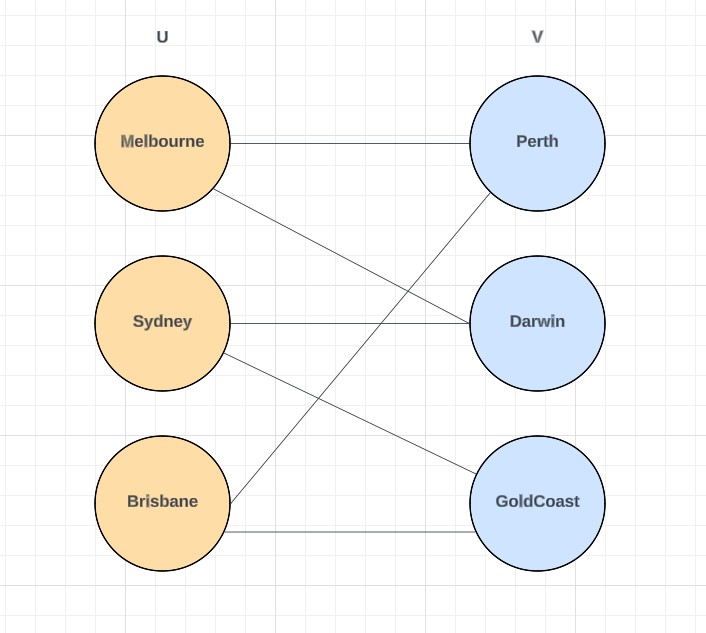

In [ ]:
# Create new graph
G1 = Graph()
for i in ['Melbourne', 'Sydney', 'Brisbane', 'Perth', 'Darwin', 'GoldCoast']:
  G1.addVertex(Node(i))

# Add edges to manipulate the bipartite graph
G1.addDiEdge(G1.vertices[0], G1.vertices[3])  # Melbourne -> Perth
G1.addDiEdge(G1.vertices[0], G1.vertices[4])  # Melbourne -> Darwin
G1.addDiEdge(G1.vertices[1], G1.vertices[4])  # Sydney -> Darwin
G1.addDiEdge(G1.vertices[1], G1.vertices[5])  # Sydney -> GoldCoast
G1.addDiEdge(G1.vertices[2], G1.vertices[3])  # Brisbane -> Perth
G1.addDiEdge(G1.vertices[2], G1.vertices[5])  # Brisbane -> GoldCoast

# Initialize colors for each node
for vertex in G1.vertices:
  vertex.color = None

if is_bipartite(G1):
  print("The graph is bipartite.")
else:
  print("The graph is not bipartite.")

Node: Perth, Color: blue
Node: Darwin, Color: blue
Node: GoldCoast, Color: blue
The graph is bipartite.


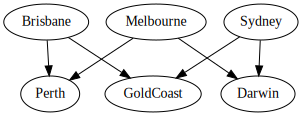

In [ ]:
# Visualise
# Create a new Digraph
dot1 = Digraph()

# Add edges from the new code block
dot1.edge('Melbourne', 'Perth')
dot1.edge('Melbourne', 'Darwin')
dot1.edge('Sydney', 'Darwin')
dot1.edge('Sydney', 'GoldCoast')
dot1.edge('Brisbane', 'Perth')
dot1.edge('Brisbane', 'GoldCoast')

# Display the graph
#print(dot1)
dot1

***

### Developing Algorithm for Strongly Connected Components

We will have to modify our DFS to incorporate the in and out time. We will have to modify our graph as well

Let us start by adding inTime and outTime in the Node first

In [ ]:
class Node:

    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []

        self.status = "unvisited"
        self.inTime = None
        self.outTime = None

    def hasOutNeighbor(self, v):

        if v in self.outNeighbors:
            return True
        return False

    def hasInNeighbor(self, v):

        if v in self.inNeighbors:
            return True
        return False

    def hasNeighbor(self, v):
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        return False

    def getOutNeighbors(self):
        return self.outNeighbors

    def getInNeighbors(self):
        return self.inNeighbors

    def addOutNeighbor(self, v):
        self.outNeighbors.append(v)

    def addInNeighbor(self, v):
        self.inNeighbors.append(v)

    def __str__(self):
        return str(self.value)

We should modify our Graph data structure to be able to reverse edges in the graph, we will do this by adding an extra function reverseEdge(u, v)

In [ ]:
class Graph:

    def __init__(self):

        self.vertices = []

    def addVertex(self,n):

        self.vertices.append(n)

    # add a directed edge from CS161Node u to CS161Node v
    def addDiEdge(self, u, v):

        u.addOutNeighbor(v)
        v.addInNeighbor(u)

    # add edges in both directions between u and v
    def addBiEdge(self, u, v):

        self.addDiEdge(u, v)
        self.addDiEdge(v, u)

    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):

        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret

    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):

        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):

            if v.hasOutNeighbor(u) and u.hasInNeighbor(v):
                return

            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)

    def __str__(self):
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

Okay, let us now modify our DFS to include in and out time during graph traversal

In [ ]:
def DFS(w, currentTime, ordering, verbose):

    if verbose:
        print("Time", currentTime, ":\t entering", w)

    w.inTime = currentTime
    currentTime += 1
    w.status = "inprogress"

    for v in w.getOutNeighbors():

        if v.status == "unvisited":
            currentTime = DFS(v, currentTime, ordering, verbose)
            currentTime += 1

    w.outTime = currentTime
    w.status = "done"
    ordering.insert(0, w)

    if verbose:
        print("Time", currentTime, ":\t leaving", w)

    return currentTime + 1  # Increment currentTime after visiting neighbors

An now the SCC algorithm:

In [ ]:
def SCC(G, verbose=False):
  # Check if one node exists then automatically graph is SCC
  if len(G.vertices) == 1:
    print("True. Only one node exists in the graph, therefore SCC.")
    return []

  stack = []
  component_list = []
  visited = set()

  # 1st DFS to fill the stack in finishing time order
  for vertex in G.vertices:
      if vertex.status == "unvisited":
          DFS(vertex, 0, stack, False)

  # Create a transposed graph by reversing all edges
  G_transposed = Graph()
  for vertex in G.vertices:
      G_transposed.addVertex(vertex)

  for a, b in G.getDirEdges():
      G_transposed.addDiEdge(b, a)

  # 2nd DFS to identify SCCs using stack and transposed graph
  while stack:
      vertex = stack.pop()
      if vertex.value not in visited:
          SCC = [] # Store SCC
          currentTime = DFS(vertex, 0, SCC, False) # DFS traversal
          component_list.append(SCC) # Add the SCC to the list
          visited.update([v.value for v in SCC]) # Mark SCC as visited


  # Check for edges connected to themselves which would be SCC
  if any(vertex in vertex.getOutNeighbors() for vertex in G.vertices):
      print("Weak SCC Graph contains an edges connected to themselves.")
      return []

  # Check for empty graph or disconnected vertices
  if not G.getDirEdges() or any(not vertex.getOutNeighbors() for vertex in G.vertices):
      print("False. No Strongly Connected Components found in the graph.")
      return []

  # Print SCC
  if component_list:
      print("True. Strongly Connected Components found in the graph.")
      print(f"Number of Strongly Connected Components: {len(component_list)}")
      for idx, SCC in enumerate(component_list, start=1):
          print(f"SCC {idx}: {[str(vertex) for vertex in SCC]}")

  return component_list

Test you code against the use case we did in the lecture


In [ ]:
stanford = Node("Stanford")
wiki = Node("Wikipedia")
nytimes = Node("NYTimes")
cal = Node("Berkeley")
puppies = Node("Puppies")
google = Node("Google")

G = Graph()
V = [ stanford, wiki, nytimes, cal, puppies, google ]
for v in V:
    G.addVertex(v)

E = [ (stanford, wiki), (stanford, puppies), (wiki, stanford), (wiki, nytimes), (nytimes, stanford), (cal, stanford), (cal, puppies), (wiki,puppies), (nytimes, puppies), (puppies, google), (google, puppies) ]
for x,y in E:
    G.addDiEdge( x,y )

# Print the graph
print("Original Graph:")
print(G)

Original Graph:
Graph with:
	 Vertices:
	Stanford,Wikipedia,NYTimes,Berkeley,Puppies,Google,
	 Edges:
	(Stanford,Wikipedia) (Stanford,Puppies) (Wikipedia,Stanford) (Wikipedia,NYTimes) (Wikipedia,Puppies) (NYTimes,Stanford) (NYTimes,Puppies) (Berkeley,Stanford) (Berkeley,Puppies) (Puppies,Google) (Google,Puppies) 



##Find Strongly Connected Components in graph (SCCs)

In [ ]:
# SCCs = SCC(G, False)
SCCs = SCC(G, False)
print("\nStrongly Connected Components:") # Add this code for clarity
# for X in SCCs:
#     print ([str(x) for x in X])

# Changed code lines above for clarity on SCC
for idx, SCC in enumerate(SCCs, start=1):
    print(f"SCC {idx}: {[str(vertex) for vertex in SCC]}")

True. Strongly Connected Components found in the graph.
Number of Strongly Connected Components: 6
SCC 1: ['Google']
SCC 2: ['Puppies']
SCC 3: ['NYTimes']
SCC 4: ['Wikipedia']
SCC 5: ['Stanford']
SCC 6: ['Berkeley']

Strongly Connected Components:
SCC 1: ['Google']
SCC 2: ['Puppies']
SCC 3: ['NYTimes']
SCC 4: ['Wikipedia']
SCC 5: ['Stanford']
SCC 6: ['Berkeley']


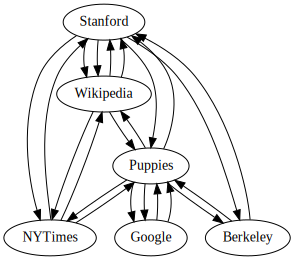

In [ ]:
# Visual digraph
dot3 = Digraph()
for vertex in G.vertices:
    dot3.node(vertex.value)

for a, b in G.getDirEdges():
    dot3.edge(a.value, b.value)

# print(dot3.source)
dot3

##Test Case: Test non Strongly Connected Components
######If a graph has no edges (disconnected graph) it cannot have strongly connected components, it is only made up of vertices (nodes).


In [ ]:
# Create non-strongly connected components
stanford = Node("Stanford")
wiki = Node("Wikipedia")
nytimes = Node("NYTimes")

G2 = Graph()
V = [ stanford, wiki, nytimes ]
for v in V:
  G2.addVertex(v)

E = [  ] # No SCC
for x,y in E:
  G2.addDiEdge( x,y )

# Print the original graph
print("Original Graph:")
print(G2)

# Run the SCC algorithm and print results
SCCs = SCC(G2, False)


Original Graph:
Graph with:
	 Vertices:
	Stanford,Wikipedia,NYTimes,
	 Edges:
	

False. No Strongly Connected Components found in the graph.


***

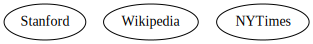

In [ ]:
# Visual digraph
dot4 = Digraph()
for vertex in G2.vertices:
    dot4.node(vertex.value)

for a, b in G2.getDirEdges():
    dot4.edge(a.value, b.value)

# print(dot3.source)
dot4

##Test Case: 2
####Additionally, if there is only one node it can be considered an SCC.


In [ ]:
# Create non-strongly connected components
stanford = Node("Stanford")

G2 = Graph()
V = [ stanford ]
for v in V:
  G2.addVertex(v)

E = [ (wiki, wiki) ] # No SCC
for x,y in E:
  G2.addDiEdge( x,y )

# Print the original graph
print("Original Graph:")
print(G2)

# Run the SCC algorithm and print results
SCCs = SCC(G2, False)

Original Graph:
Graph with:
	 Vertices:
	Stanford,
	 Edges:
	

True. Only one node exists in the graph.


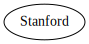

In [ ]:
# Visual digraph
dot4 = Digraph()
for vertex in G2.vertices:
    dot4.node(vertex.value)

for a, b in G2.getDirEdges():
    dot4.edge(a.value, b.value)

# print(dot3.source)
dot4

##Test Case: 3
####If there is only a single-node SCC which is a node that self-loops it would form one single-node strongly connected component, which can be considered an SCC.



In [ ]:
# Create non-strongly connected components
stanford = Node("Stanford")
wiki = Node("Wikipedia")

G2 = Graph()
V = [ stanford,  wiki ] # Nodes
for v in V:
  G2.addVertex(v)

E = [ (wiki, wiki) ] # Connections
for x,y in E:
  G2.addDiEdge( x,y )

# Print the original graph
print("Original Graph:")
print(G2)

# Run the SCC algorithm and print results
SCCs = SCC(G2, False)

Original Graph:
Graph with:
	 Vertices:
	Stanford,Wikipedia,
	 Edges:
	(Wikipedia,Wikipedia) 

Weak SCC Graph contains an edges connected to themselves.


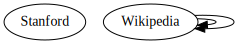

In [ ]:
# Visual digraph
dot4 = Digraph()
for vertex in G2.vertices:
    dot4.node(vertex.value)

for a, b in G2.getDirEdges():
    dot4.edge(a.value, b.value)

# print(dot3.source)
dot4